# Exploration et Analyse du dataset créé 

### 1. Rapide aperçu du jeu de données

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk import RegexpTokenizer
from nltk.corpus import stopwords


In [2]:
# Chemin vers le fichier
PATH = "./datasets/Nos datasets/"
FILENAME = "toyset_custom1.tsv"


# Lecture du fichier
df = pd.read_csv(PATH+FILENAME, sep='\t')
# df.remove(labels=0, axis=0, inplace=True) si la première ligne est 'vide'
df.head(10)

,Question,Reponse
0,Quels sont tes centres d'interets,Je suis interessé par beaucoup de choses. Nous...
1,Quels sont tes centres d'interets,Je suis interessé par une grande variete de su...
2,Quels sont tes sujets preferes,"Mes sujets preferes incluent la robotique, l'i..."
3,Quel est ton numero,Je n'ai pas de numero.
4,Quel est ton numero,"5446, c'est mon numero maintenant."
5,Quel est ton numero prefere,"J'aime bien le chiffre 42, il repond à de nomb..."
6,Qu'est ce que tu manges,"Je consomme de la RAM, et des chiffres binaires."
7,Pourquoi ne manges tu pas de nourriture,Je suis un programme informatique.
8,Où te trouves tu,Partout.
9,Quelle est ton adresse,Partout.


In [3]:
# Compter le nombre de NaN
print(df.isna().sum())
print('---')
print("Taille du dataset : ", len(df))

Question    0
Reponse     0
dtype: int64
---
Taille du dataset :  16049


In [4]:
# Compter le nombre de "data/ligne" répétée
mask_duplicated = df.duplicated()
mask_duplicated.sum()

1949

In [5]:
# Supprimer les répétitions
df_new = df[~mask_duplicated]
print("Taille du dataset après suppressions des occurences: ", len(df_new))

Taille du dataset après suppressions des occurences:  14100


In [6]:
nbr_unique_questions = len(df_new.Question.unique())
nbr_unique_answers = len(df_new.Reponse.unique())
print("Nombre de questions distinctes : ", nbr_unique_questions)
print("Nombre de réponses  distinctes : ", nbr_unique_answers)

Nombre de questions distinctes :  13010
Nombre de réponses  distinctes :  6206


### 2. Quelques graphes 

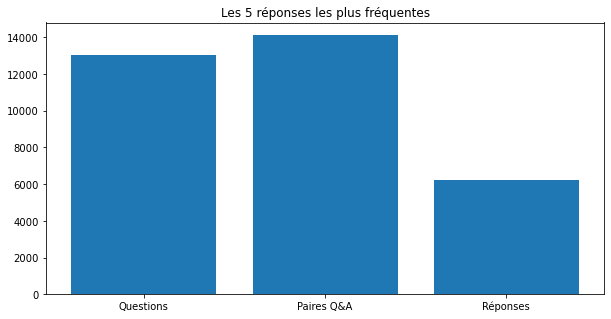

In [7]:
plt.figure(figsize=(10,5))
plt.bar(["Questions", "Paires Q&A", "Réponses"], [nbr_unique_questions, len(df_new), nbr_unique_answers])
plt.title("Les 5 réponses les plus fréquentes")
plt.show()

* On remarque que nous avons très peu de réponses 'unique'. 
> Cela peut s'expliquer en disant que certaines questions peuvent avoir une seule et même réponse, mais cela signifie aussi que nous n'avons pas une grande *diversité* au niveau des réponses et que le vocabulaire est très restraint.

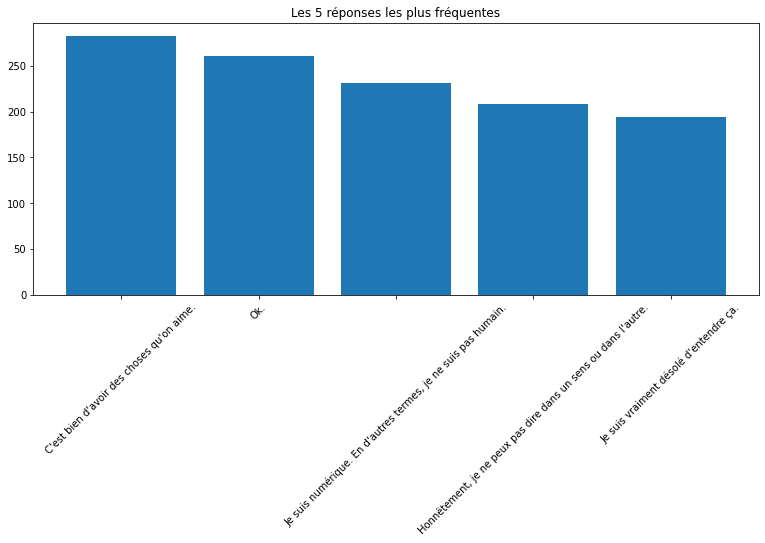

In [8]:
# TOP 5 des réponses les plus répétées
reponses = df_new.Reponse.value_counts()
plt.figure(figsize=(13,5))
plt.xticks(rotation=45)
plt.bar(reponses.index[:5], reponses.values[:5])
plt.title("Les 5 réponses les plus fréquentes")
plt.show()

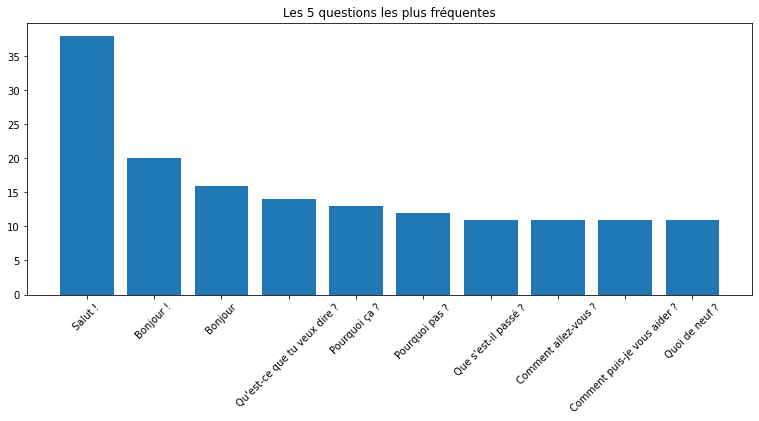

In [9]:
# TOP 5 des questions les plus répétées
questions = df_new.Question.value_counts()
plt.figure(figsize=(13,5))
plt.xticks(rotation=45)
plt.bar(questions.index[:10], questions.values[:10])
plt.title("Les 5 questions les plus fréquentes")
plt.show()

In [10]:
# Regardons de plus près les mots qu'on a utilisé
toknizer = RegexpTokenizer(r'''\w\w+|[^\w\s]''')

# Les stopswords (ceux de la librairie NLTK + la ponctuation) + j' c', s', n' (comme dans j'ai, s'est, c'est, n'ai)
stop = set(stopwords.words('french') + list(string.punctuation) + list(["j'", "c'", "s'","n'", "l'", "d'"]))

# Application qui supprime les stops words (pas pertinents pour nous)
filtre_stopfr =  lambda text: [token for token in text if token.lower() not in stop]

In [11]:
# Créer une copie pour remplacer le texte brut par des tokens
df_analysis = df_new.copy()

df_analysis["Question Tokens"] = [filtre_stopfr(toknizer.tokenize(text.lower())) for text in df_new["Question"].values]
df_analysis["Reponse Tokens"]  = [filtre_stopfr(toknizer.tokenize(text.lower())) for text in df_new["Reponse"].values]

df_analysis.drop(labels=["Question", "Reponse"], axis=1, inplace=True)

df_analysis.head(10)

,Question Tokens,Reponse Tokens
0,"[quels, centres, interets]","[interessé, beaucoup, choses, pouvons, parler,..."
1,"[quels, centres, interets]","[interessé, grande, variete, sujets, lit, plut..."
2,"[quels, sujets, preferes]","[sujets, preferes, incluent, robotique, inform..."
3,"[quel, numero]",[numero]
4,"[quel, numero]","[5446, numero, maintenant]"
5,"[quel, numero, prefere]","[aime, bien, chiffre, 42, repond, nombreuses, ..."
6,[manges],"[consomme, ram, chiffres, binaires]"
7,"[pourquoi, manges, nourriture]","[programme, informatique]"
8,"[où, trouves]",[partout]
9,"[quelle, adresse]",[partout]


In [12]:
# Counter ; Compte le nombre d'occurence de chacun des tokens

# 2D vers 1D (pour le Counter)
all_questions = list(np.concatenate(df_analysis["Question Tokens"].values).flat)
all_answers = list(np.concatenate(df_analysis["Reponse Tokens"].values).flat)

# Counter pour les questions et l'autre pour les réponses
C_Questions = Counter(all_questions)
C_Answers = Counter(all_answers)

In [13]:
# les n tokens les plus utilisés 
n = 30

tok_name = lambda l: [t[0] for t in l]
tok_occ = lambda l: [t[1] for t in l]

<ipython-input-14-f5111bb42cab>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


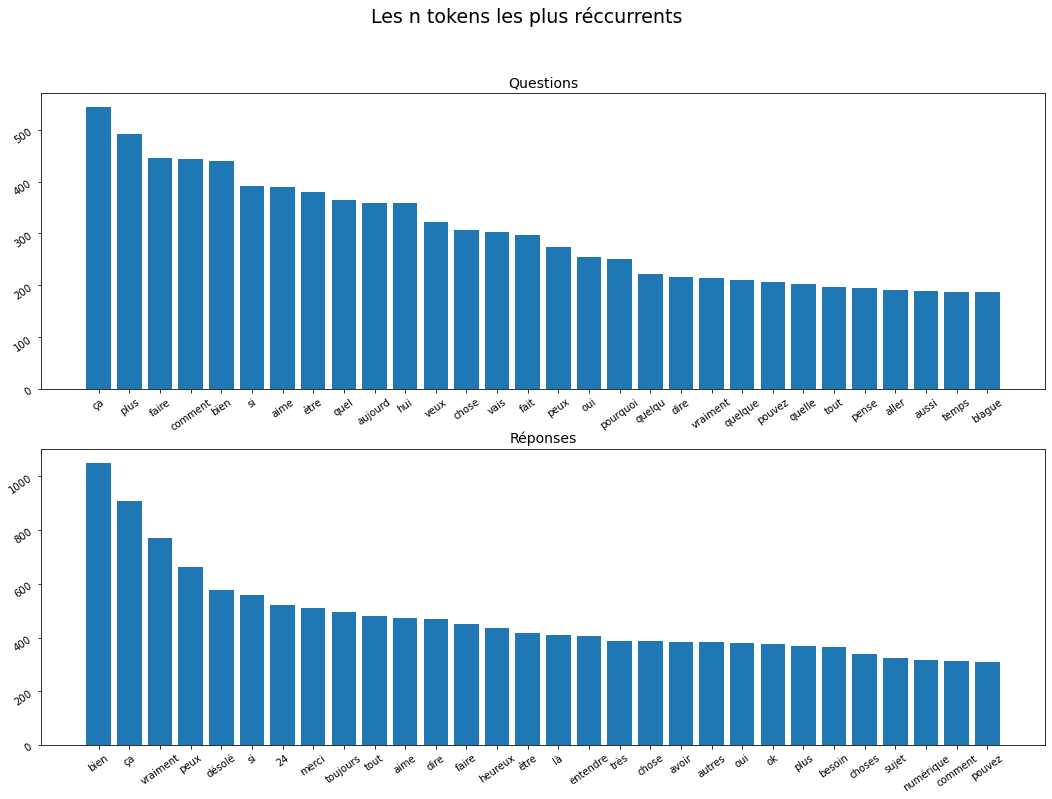

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(18,12))
axes[0].bar(tok_name(C_Questions.most_common(n)), tok_occ(C_Questions.most_common(n)))
axes[0].tick_params(labelrotation=35)
axes[0].set_title("Questions", size=14)
axes[1].bar(tok_name(C_Answers.most_common(n)), tok_occ(C_Answers.most_common(n)))
axes[1].tick_params(labelrotation=35)
axes[1].set_title("Réponses", size=14)
fig.suptitle("Les n tokens les plus réccurrents", size=19)
fig.show()

In [15]:
# Nombre de caractères par ligne
df_analysis["Question Number Char"] = [len(i) for i in df_new["Question"].values]
df_analysis["Reponse Number Char"] = [len(i) for i in df_new["Reponse"].values]

# Nombre de tokens par ligne
df_analysis["Question Number Tokens"] = [len(i) for i in df_analysis["Question Tokens"].values]
df_analysis["Reponse Number Tokens"] = [len(i) for i in df_analysis["Reponse Tokens"].values]

# Aperçu
df_analysis

,Question Tokens,Reponse Tokens,Question Number Char,Reponse Number Char,Question Number Tokens,Reponse Number Tokens
0,"[quels, centres, interets]","[interessé, beaucoup, choses, pouvons, parler,...",33,80,3,7
1,"[quels, centres, interets]","[interessé, grande, variete, sujets, lit, plut...",33,75,3,7
2,"[quels, sujets, preferes]","[sujets, preferes, incluent, robotique, inform...",30,106,3,9
3,"[quel, numero]",[numero],19,22,2,1
4,"[quel, numero]","[5446, numero, maintenant]",19,34,2,3
...,...,...,...,...,...,...
16044,"[fatigué, travail]","[espère, pourras, bientôt, reposer]",30,43,2,4
16045,"[totalement, épuisé]","[espère, pourras, bientôt, reposer]",26,43,2,4
16046,"[totalement, épuisée]","[dure, journée, espère, pourras, bientôt, repo...",26,57,2,6
16047,[zzzzz],"[espère, pourrez, bientôt, reposer]",5,47,1,4


In [16]:
print("Un peu d'analyse ...")
print("")
print("La question la plus longue (en terme de nombres caractères) a", np.max(df_analysis["Question Number Char"].values), "charactères")
print("Voici la phrase en question : \n\t", df_new["Question"].iloc[np.argmax(df_analysis["Question Number Char"].values)])
print("")
print("______________________________")
print("")
print("La question la plus longue (en terme de nombres de tokens) a", np.max(df_analysis["Question Number Tokens"].values), "tokens")
print("Voici la phrase en question : \n\t", df_new["Question"].iloc[np.argmax(df_analysis["Question Number Tokens"].values)])


Un peu d'analyse ...

La question la plus longue (en terme de nombres caractères) a 434 charactères
Voici la phrase en question : 
	 Nous avons créé une bourse pour les dirigeants de <REDACTED_TERM> afin qu'ils puissent visiter un institut international à <REDACTED_TERM> pour lequel il n'y avait pas de représentation africaine. Pendant le programme, nous avons également fait beaucoup de coaching avec les jeunes leaders. Ce livre capture un peu de ce voyage que nous avons tous entrepris, et tous les bénéfices serviront à financer la cohorte de l'année prochaine.

______________________________

La question la plus longue (en terme de nombres de tokens) a 38 tokens
Voici la phrase en question : 
	 Non, j'étais occupé à rattraper le temps perdu avec un ami. J'ai entendu dire qu'ils ont très bien joué. Je vais les encourager cette saison 🙂 Ahh, ils ont encore perdu 😞 Les choses ne vont pas aller bien jusqu'à ce que Steph aille mieux ! Oh ! Je pense qu'ils vont trouver un moyen. L'équipe me

<ipython-input-17-967346e96ff8>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


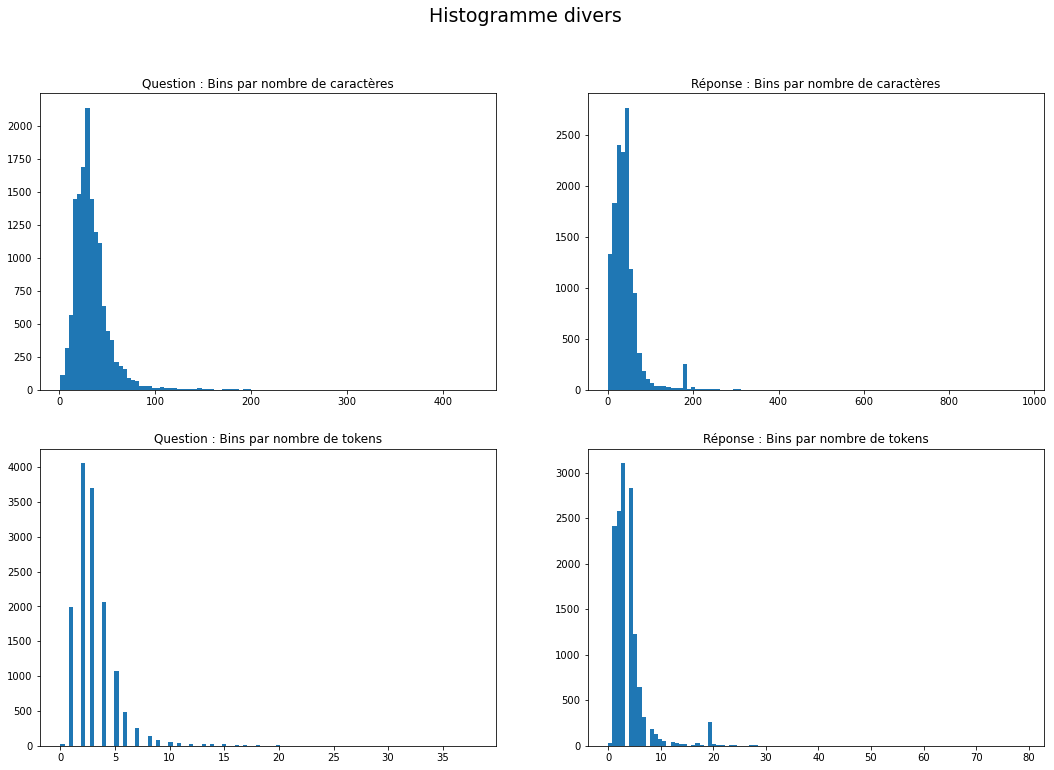

In [17]:
# Plot les graphs
fig, axes = plt.subplots(2,2, figsize=(18, 12))

n_bins = 100

axes[0][0].hist(df_analysis["Question Number Char"], n_bins)
axes[0][0].set_title("Question : Bins par nombre de caractères")

axes[0][1].hist(df_analysis["Reponse Number Char"], n_bins)
axes[0][1].set_title("Réponse : Bins par nombre de caractères")

axes[1][0].hist(df_analysis["Question Number Tokens"], n_bins)
axes[1][0].set_title("Question : Bins par nombre de tokens")

axes[1][1].hist(df_analysis["Reponse Number Tokens"], n_bins)
axes[1][1].set_title("Réponse : Bins par nombre de tokens")

fig.suptitle("Histogramme divers", size=19)
fig.show()